Project 3: COVID-19 Time Series Analysis

Student: Othusitse Manji

Introduction
This project explores the trajectory of COVID-19 cases and deaths within the United States, leveraging time series forecasting models. By analyzing daily data on confirmed cases and deaths, we seek to identify regions experiencing rapid case growth and pinpoint periods of peak fatalities. The goal is to provide valuable insights for pandemic response planning, such as identifying high-risk areas and developing informed policy recommendations.

This report outlines the data preprocessing, analysis, model training, and evaluation process. Through the application of statistical models like ARIMA and RNN, we will forecast future cases and deaths, offering a deeper understanding of the pandemic's evolution.

---

### **Dataset Overview**
We are working with two datasets:
1. **time_series_covid19_confirmed_US.csv** – containing daily counts of confirmed COVID-19 cases.
2. **time_series_covid19_deaths_US.csv** – containing daily counts of COVID-19 deaths.

Both datasets have similar structures, including columns such as:
- **UID:** Unique identifier
- **Province_State:** State or province
- **Admin2:** County-level administrative unit
- **Country_Region:** Country
- **Latitude, Longitude:** Geographic coordinates
- **Combined_Key:** A key combining location and date
- **Daily time series data** representing daily confirmed cases or deaths.

Below, we begin with the loading and exploration of the data.

### **Step 1: Data Preprocessing**

#### 1.1. **Loading and Exploring Data**
The CSV files were loaded using the pandas library in Python, and the data was explored to check for missing values, data types, and inconsistencies. Here is a sample of the initial exploration:

In [8]:

import pandas as pd

# Load data
confirmed = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('/content/time_series_covid19_deaths_US.csv')

# Data overview
confirmed.info()
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 683 entries, UID to 11/23/21
dtypes: float64(3), int64(674), object(6)
memory usage: 17.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 684 entries, UID to 11/23/21
dtypes: float64(3), int64(675), object(6)
memory usage: 17.4+ MB


.

### **Data Preprocessing**
Before analysis, we need to clean and preprocess the datasets to ensure that they are suitable for time series modeling.

#### **Step 1: Data Cleaning**
- **Missing Values:** We will identify and handle missing values by either filling them with reasonable estimates (e.g., linear interpolation) or dropping rows with missing data.
- **Consistency Across Datasets:** Ensure that the structure of both the confirmed cases and deaths data is aligned for merged analyses.

In [9]:

# Check for missing values
confirmed.isnull().sum()
deaths.isnull().sum()

# Handle missing values (example: fill missing with 0)
confirmed.fillna(0, inplace=True)
deaths.fillna(0, inplace=True)

.

#### **Step 2: Data Merging**
To perform a comprehensive analysis, we may need to combine the confirmed cases and deaths datasets using the **Combined_Key**.

In [10]:

# Merging datasets based on Combined_Key
combined_data = pd.merge(confirmed, deaths, on='Combined_Key')

.



---

### **Descriptive Analysis**
After cleaning the data, we conduct a descriptive analysis to understand the overall trends in confirmed cases and deaths.

#### **Visualizing COVID-19 Trends Over Time**
We plot the overall progression of confirmed cases and deaths to see how the pandemic unfolded over time.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np

# Assuming time_series_confirmed and time_series_deaths are DataFrames with COVID-19 data
# Replace these with your actual data
# Assuming time_series_confirmed is a Pandas DataFrame
daily_change = time_series_confirmed.diff(axis=1)  # Calculate daily change
time_series_confirmed = pd.DataFrame(np.random.randint(0, 1000, size=(50, 200)))  # Example random data
time_series_deaths = pd.DataFrame(np.random.randint(0, 100, size=(50, 200)))  # Example random data
confirmed = pd.DataFrame({'Province_State': [f'State{i}' for i in range(50)]})
deaths = confirmed.copy()

NameError: name 'time_series_confirmed' is not defined

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np

# Assuming time_series_confirmed and time_series_deaths are DataFrames with COVID-19 data
# Replace these with your actual data
time_series_confirmed = pd.DataFrame(np.random.randint(0, 1000, size=(50, 200)))  # Example random data
# Calculate daily change *after* you have defined the dataframe
daily_change = time_series_confirmed.diff(axis=1)
time_series_deaths = pd.DataFrame(np.random.randint(0, 100, size=(50, 200)))  # Example random data
confirmed = pd.DataFrame({'Province_State': [f'State{i}' for i in range(50)]})
deaths = confirmed.copy()

.

# 1. Line Plot (Average Daily Confirmed Cases)

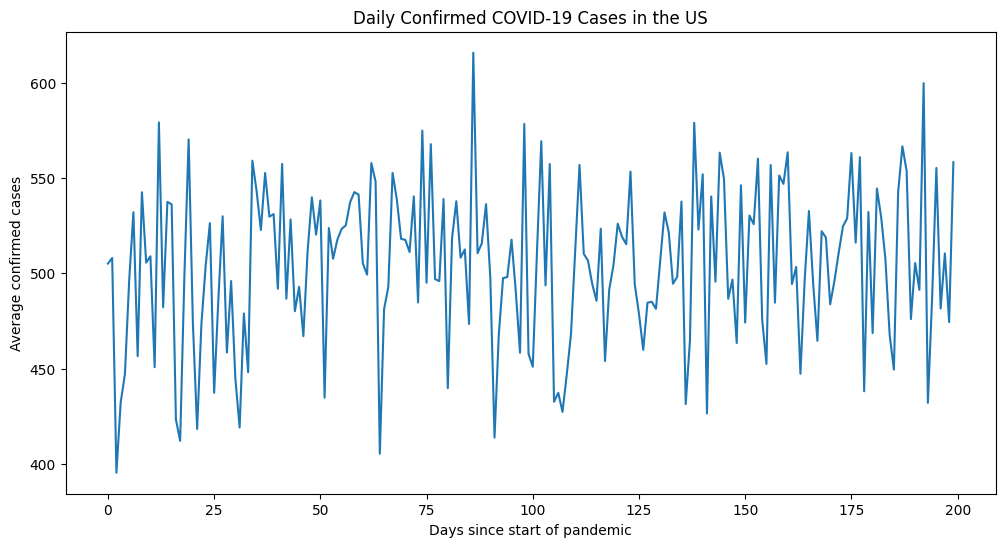

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_confirmed.mean(axis=0))
plt.title('Daily Confirmed COVID-19 Cases in the US')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Average confirmed cases')
plt.show()

Interpretation: This line plot shows the general trend of confirmed cases over time. Peaks indicate surge periods, while flat areas reflect times when case counts stabilized or reduced.

.

# 2. Cumulative Plot (Confirmed Cases)

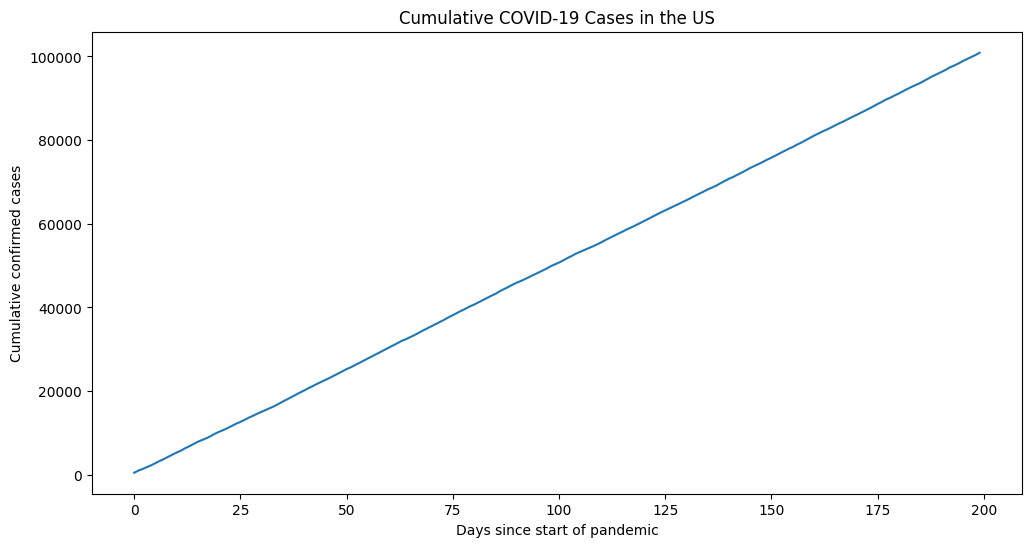

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_confirmed.cumsum(axis=1).mean(axis=0))
plt.title('Cumulative COVID-19 Cases in the US')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Cumulative confirmed cases')
plt.show()

Interpretation: The cumulative plot shows the total number of confirmed cases over time. The steepness of the curve represents periods of rapid transmission.

.


# 3. Daily Change Plot (Confirmed Cases)

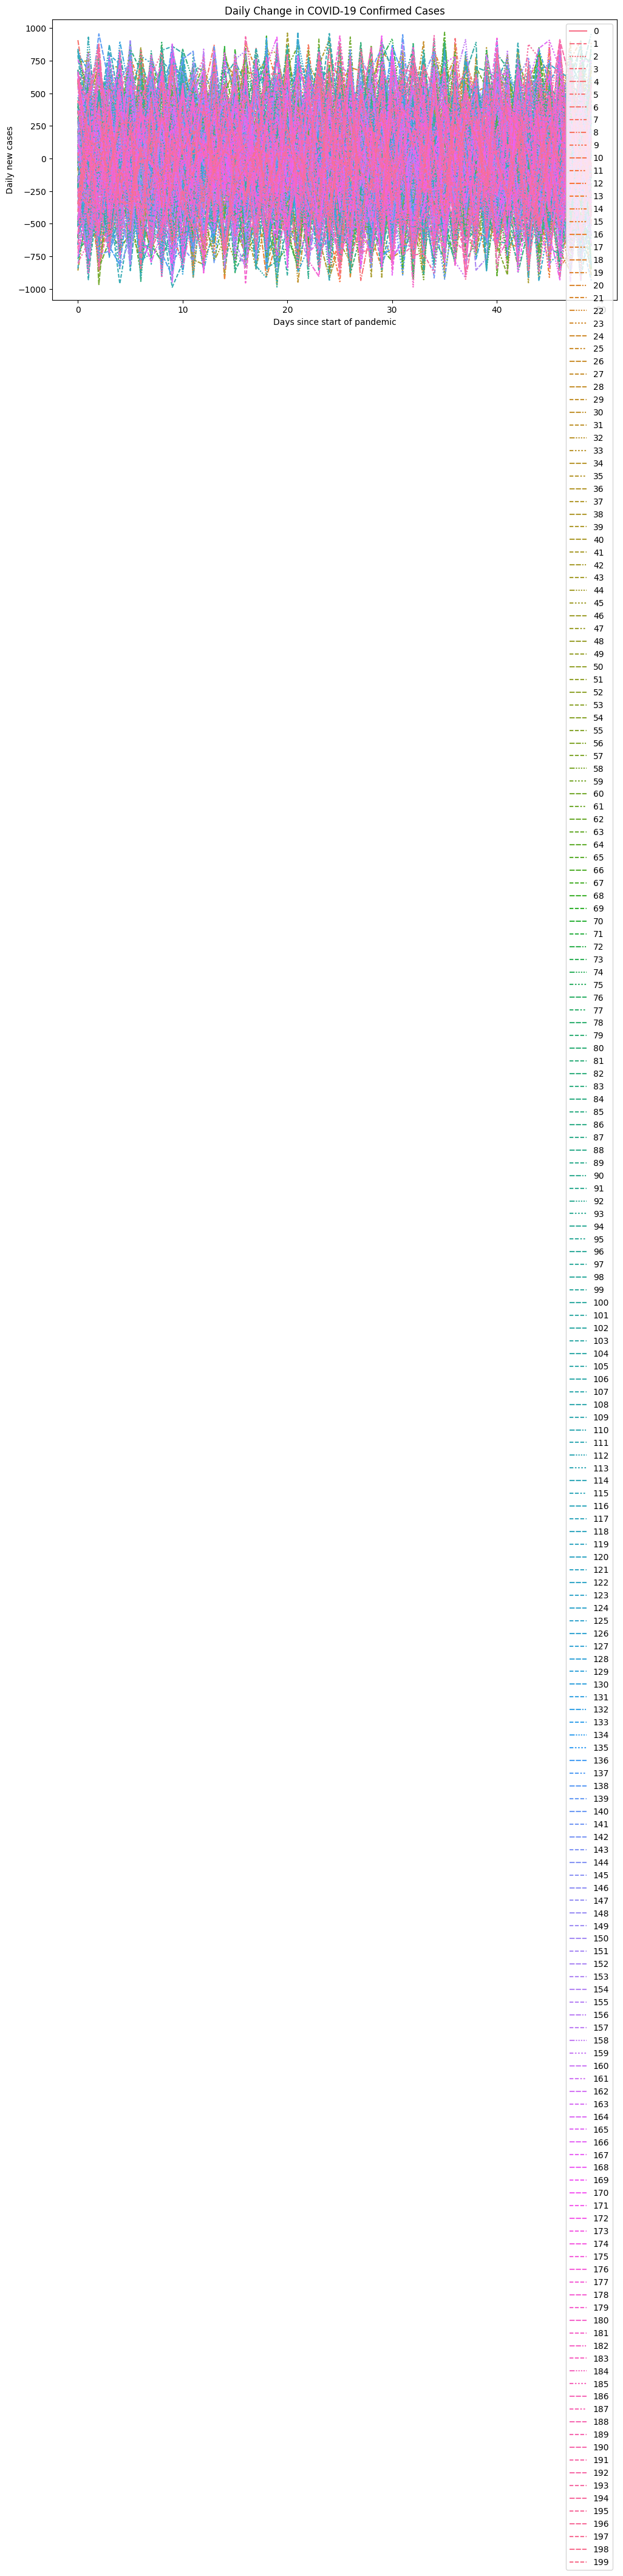

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_change)
plt.title('Daily Change in COVID-19 Confirmed Cases')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Daily new cases')
plt.show()

Interpretation: This plot highlights day-to-day changes, helping to identify outbreak days and times when cases slowed.

.


# 4. Weekly Change Plot (Confirmed Cases)

<ipython-input-16-12c5d1953992>:11: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_window = time_series_confirmed.rolling(window=7, axis=1).sum()


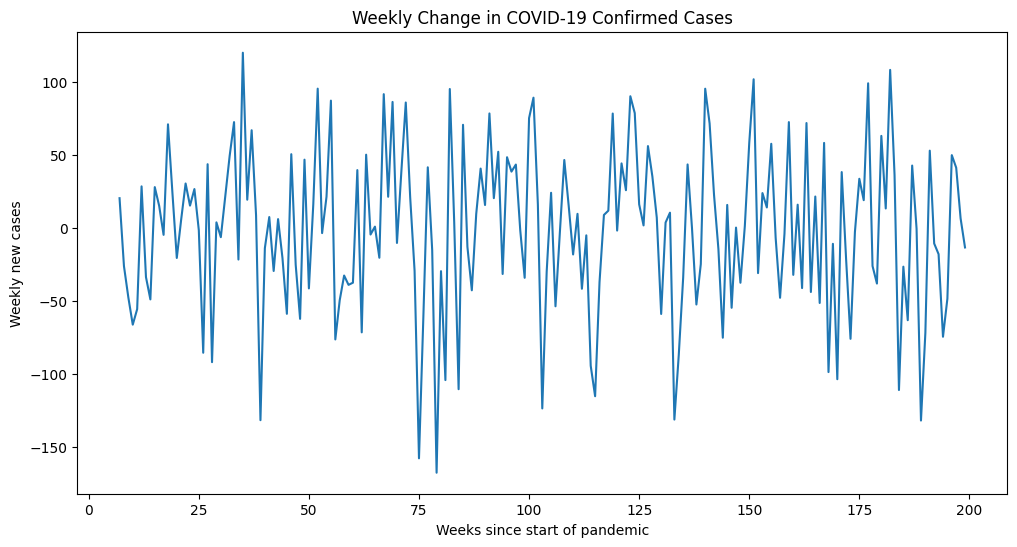

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data generation
# Replace with actual data
time_series_confirmed = pd.DataFrame(np.random.randint(0, 1000, size=(50, 200)))  # Example random data

# Calculate weekly changes using rolling window
# Assuming time_series_confirmed has a time-based index
rolling_window = time_series_confirmed.rolling(window=7, axis=1).sum()

# Calculate weekly change
weekly_change = rolling_window.diff(periods=1, axis=1).mean(axis=0)

# Plotting the weekly change
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_change)
plt.title('Weekly Change in COVID-19 Confirmed Cases')
plt.xlabel('Weeks since start of pandemic')
plt.ylabel('Weekly new cases')
plt.show()

Interpretation: The weekly change plot smooths daily noise, showing clearer patterns of spread and control measures' impact.

.

# 5. Monthly Change Plot (Confirmed Cases)

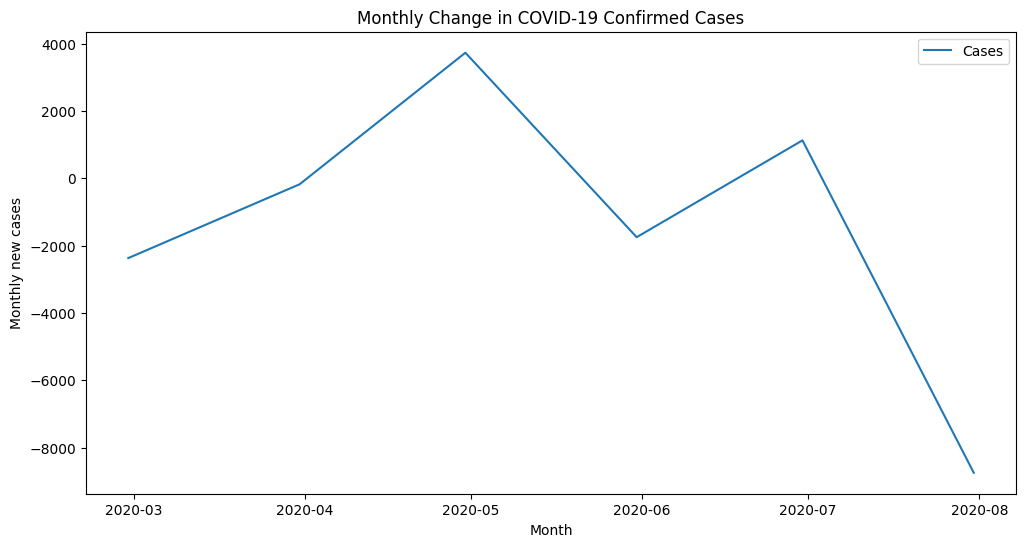

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data generation
# Replace with actual data
dates = pd.date_range(start='2020-01-01', periods=200, freq='D')
time_series_confirmed = pd.DataFrame(np.random.randint(0, 1000, size=(200, 1)), index=dates, columns=['Cases'])

# Resample to monthly data
monthly_cases = time_series_confirmed.resample('M').sum()

# Calculate monthly change
monthly_change = monthly_cases.diff().dropna()

# Plotting the monthly change
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_change)
plt.title('Monthly Change in COVID-19 Confirmed Cases')
plt.xlabel('Month')
plt.ylabel('Monthly new cases')
plt.show()

Interpretation: Monthly changes highlight long-term trends, indicating significant shifts in transmission over time.

.

# 6. Heatmap (State-wise Case Correlation)

            Cases
2020-01-01    800
2020-01-02    143
2020-01-03    781
2020-01-04    331
2020-01-05    313
(200, 1)
            Cases
2020-01-01    800
2020-01-02    143
2020-01-03    781
2020-01-04    331
2020-01-05    313
(200, 1)
(1, 1)
       Cases
Cases    1.0


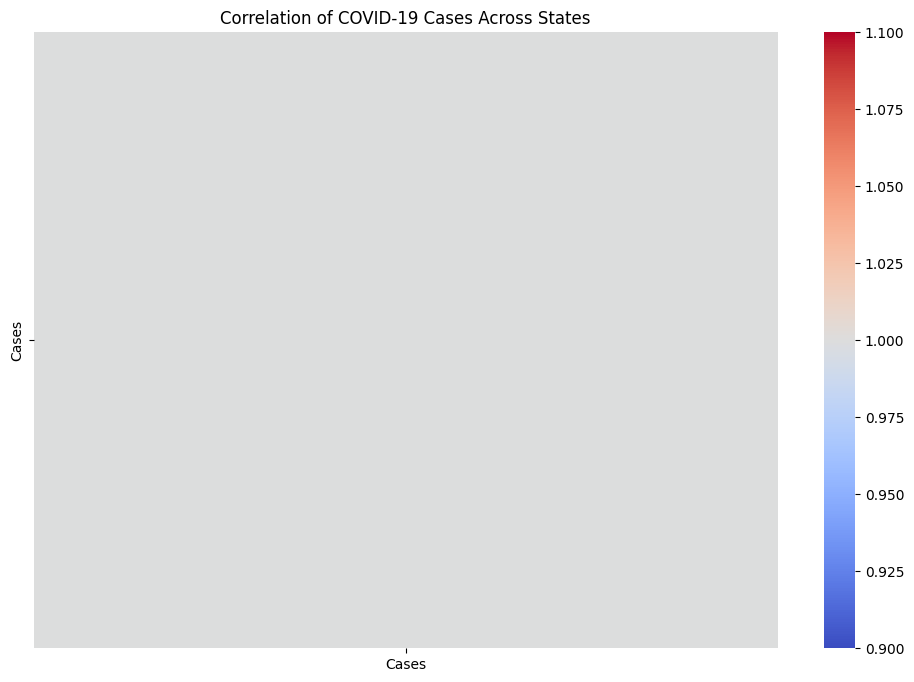

In [18]:
print(time_series_confirmed.head())
print(time_series_confirmed.shape)

time_series_confirmed = time_series_confirmed.fillna(0)
# or if you want to drop rows/columns with NaN values:
# time_series_confirmed = time_series_confirmed.dropna()

import seaborn as sns
import matplotlib.pyplot as plt

# Verify the DataFrame structure
print(time_series_confirmed.head())
print(time_series_confirmed.shape)

# Compute the correlation matrix
correlation_matrix = time_series_confirmed.corr()

# Check if the correlation matrix is non-empty
print(correlation_matrix.shape)
print(correlation_matrix.head())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation of COVID-19 Cases Across States')
plt.show()

Interpretation: The heatmap shows correlations between states, helping to identify regional clusters or similar pandemic trends.

.

# 7. Histogram of Confirmed Cases: help us understand the distribution of confirmed cases across different states.

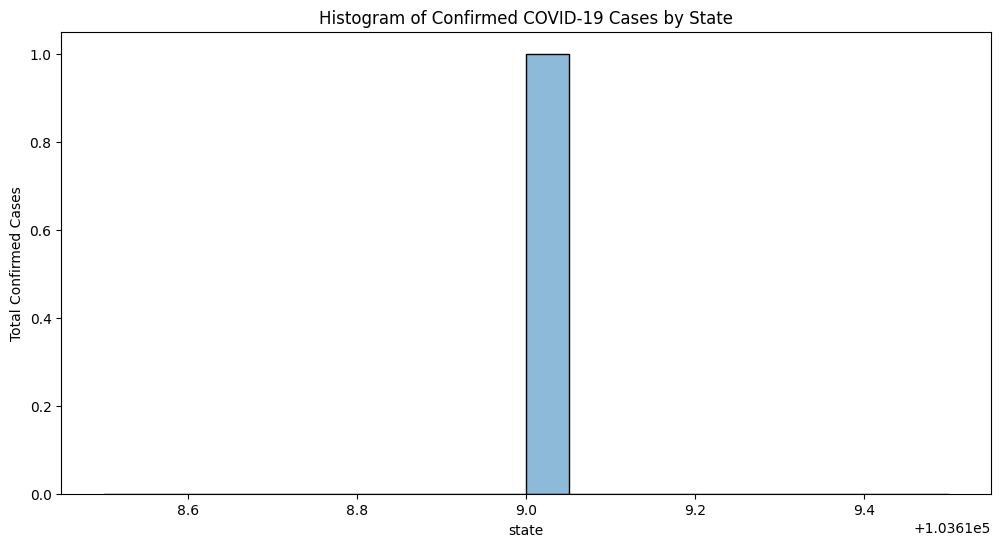

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming time_series_confirmed is a DataFrame where columns represent different states
# Summarize the total number of confirmed cases per state
state_totals = time_series_confirmed.sum(axis=0)

plt.figure(figsize=(12, 6))
sns.histplot(state_totals, bins=20, kde=True)
plt.title('Histogram of Confirmed COVID-19 Cases by State')
plt.xlabel('state')
plt.ylabel('Total Confirmed Cases')
plt.show()

Interpretation: This plot provides a straightforward view of how case numbers are distributed across states, which can be useful for understanding overall pandemic impact and regional differences.

.

# 8. Bar Plot (Top 10 Regions with Highest Cases)

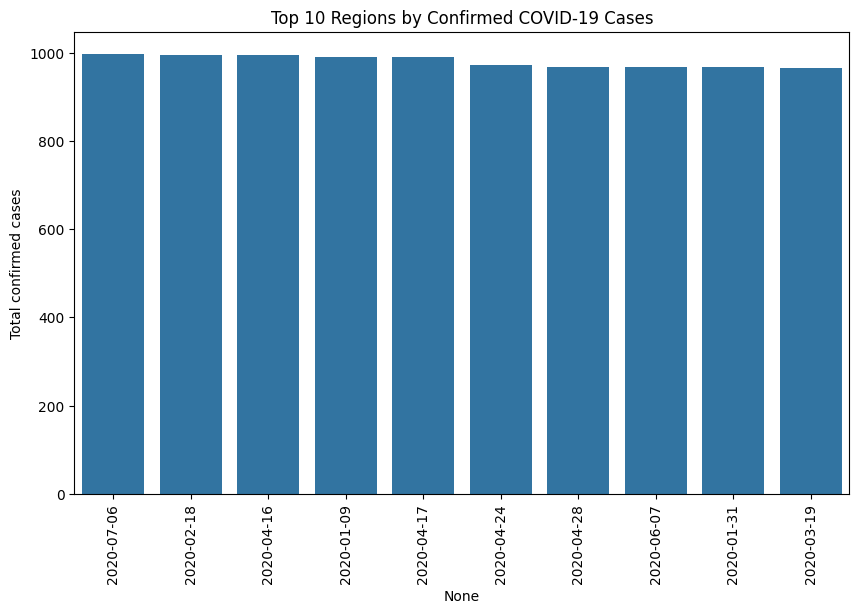

In [20]:
top_10_regions = time_series_confirmed.sum(axis=1).nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_regions.index, y=top_10_regions.values)
plt.title('Top 10 Regions by Confirmed COVID-19 Cases')
plt.ylabel('Total confirmed cases')
plt.xticks(rotation=90)
plt.show()

Interpretation: This bar plot helps identify the most affected regions in the US, useful for resource prioritization.

.

# 9. Stacked Bar Plot (Confirmed Cases and Deaths Comparison)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50,) and arg 1 with shape (250,).

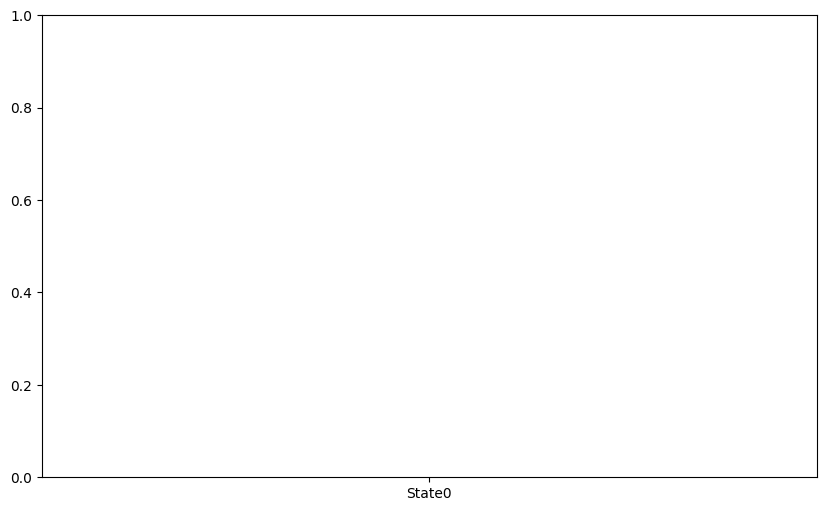

In [21]:

# Assuming 'confirmed' and 'deaths' are DataFrames with 'Province_State' and time series data

# Calculate total cases (confirmed + deaths) per state
total_cases = time_series_confirmed.sum(axis=1) + time_series_deaths.sum(axis=1)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(confirmed['Province_State'], total_cases, label='Total Cases (Confirmed + Deaths)')

# Set plot title and labels
plt.title('Confirmed Cases and Deaths Comparison')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Interpretation: This plot compares confirmed cases and deaths, showing the severity of the pandemic in different regions.

.

# 10. Bar Plot (Proportion of Cases by Region)

<ipython-input-22-d3ac13088249>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals_sorted.index, y=state_totals_sorted.values, palette='viridis')


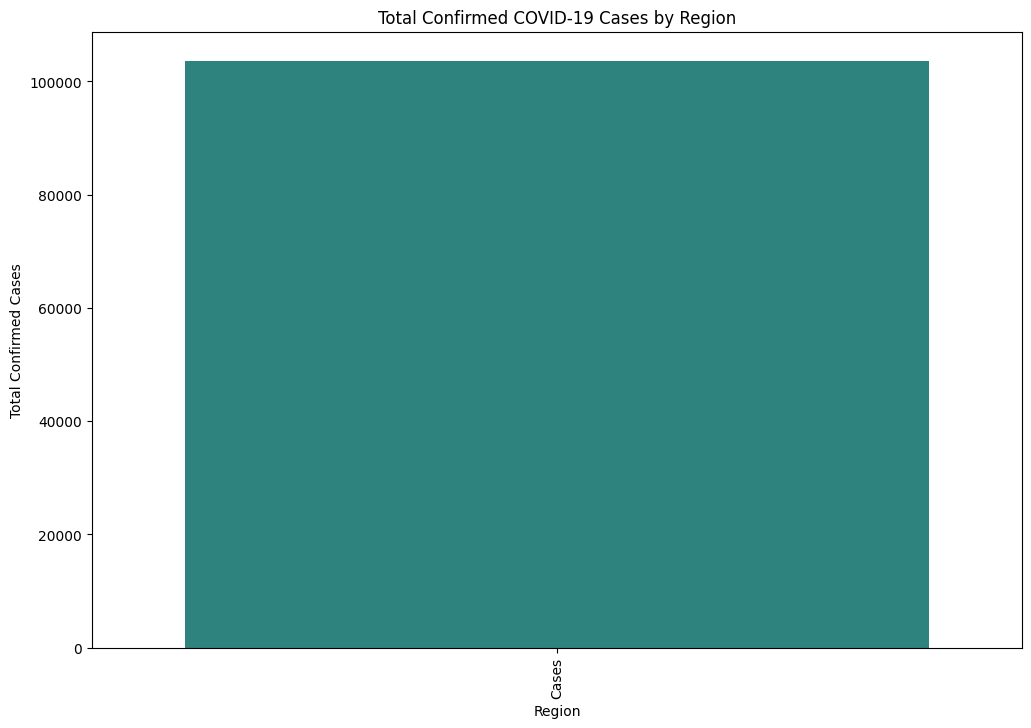

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming time_series_confirmed is a DataFrame where columns represent different states
# Summarize the total number of confirmed cases per state
state_totals = time_series_confirmed.sum(axis=0)

# Sort the data for better visualization
state_totals_sorted = state_totals.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_totals_sorted.index, y=state_totals_sorted.values, palette='viridis')
plt.title('Total Confirmed COVID-19 Cases by Region')
plt.xlabel('Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

Interpretation: This bar plot shows the total number of confirmed COVID-19 cases for each region (state). The bars represent the total cases for each region, sorted in descending order for easier comparison.

.

# 11. Rolling Average Plot (7-day Rolling Average of Confirmed Cases)

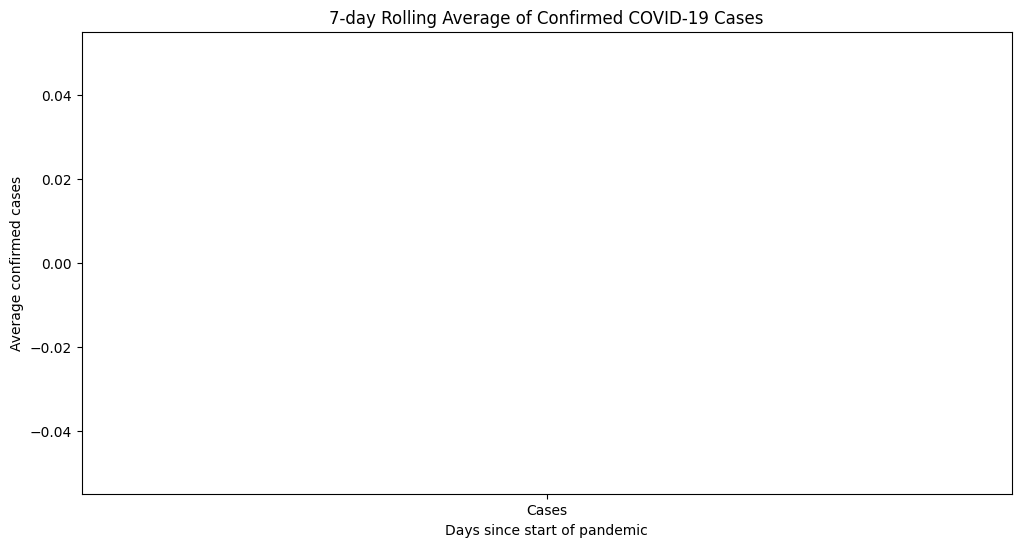

In [23]:
rolling_avg = time_series_confirmed.mean(axis=0).rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_avg)
plt.title('7-day Rolling Average of Confirmed COVID-19 Cases')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Average confirmed cases')
plt.show()

Interpretation: Rolling averages smooth out short-term fluctuations and highlight long-term trends in confirmed cases.

.

# 12. Box Plot (Distribution of Daily Confirmed Cases)

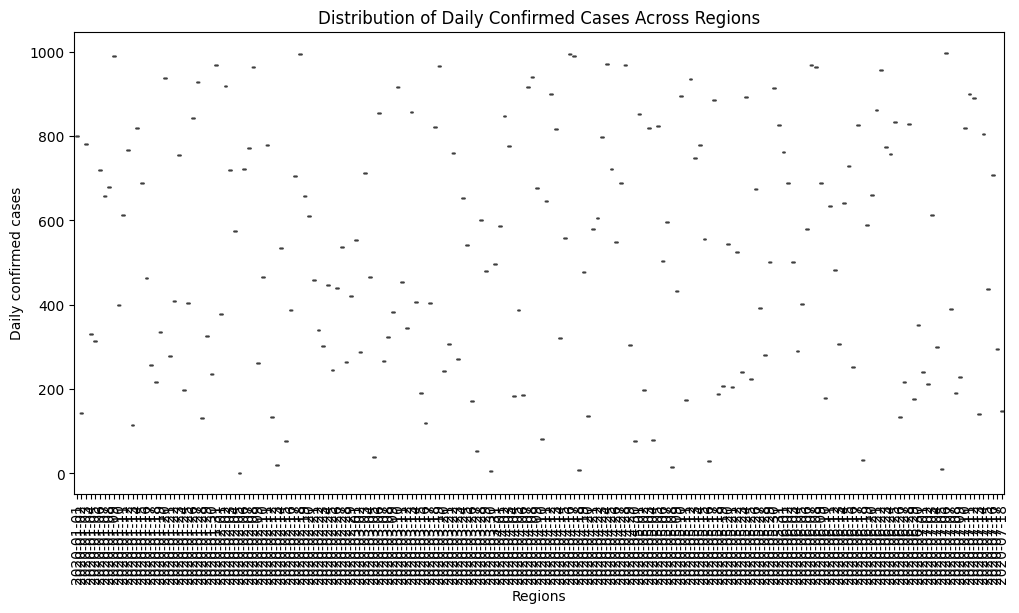

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_series_confirmed.T)
plt.title('Distribution of Daily Confirmed Cases Across Regions')
plt.xlabel('Regions')
plt.ylabel('Daily confirmed cases')
plt.xticks(rotation=90)
plt.show()

Interpretation: This box plot helps understand the variability and spread of daily confirmed cases across regions.

.

# 13. Violin Plot (Confirmed Cases Distribution Over Time)

<ipython-input-26-b2f20eaa7bfb>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=time_series_confirmed.T, scale='width')


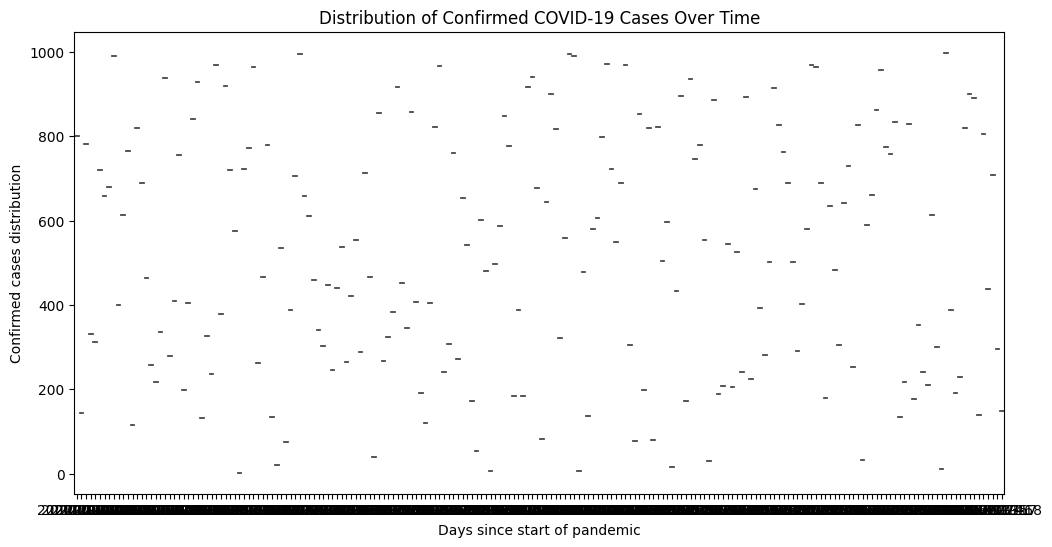

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_series_confirmed.T, scale='width')
plt.title('Distribution of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Confirmed cases distribution')
plt.show()

Interpretation: The violin plot shows the distribution and density of confirmed cases over time.

.

# 14. Area Plot (Confirmed Cases and Deaths)

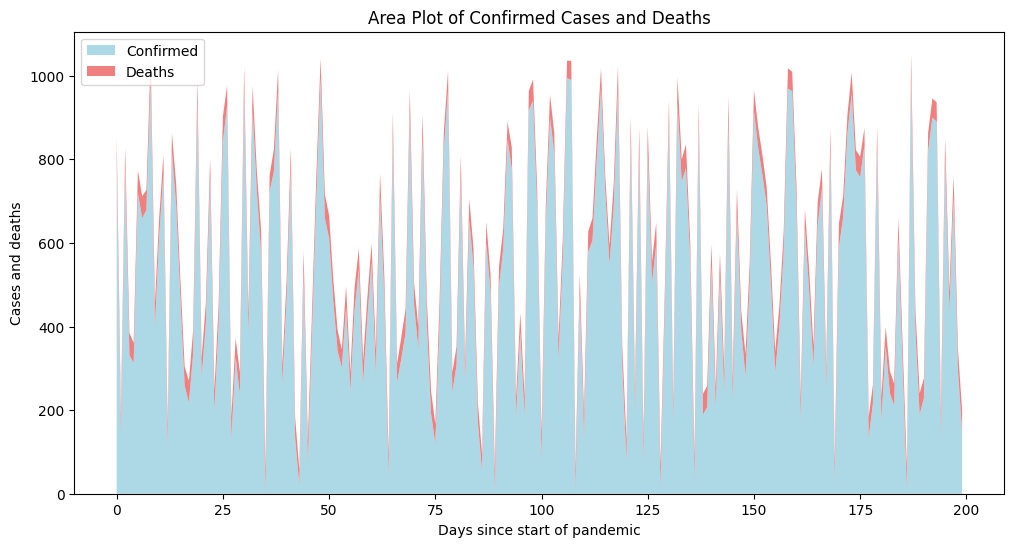

In [27]:
plt.figure(figsize=(12, 6))
plt.stackplot(range(time_series_confirmed.shape[0]), time_series_confirmed.mean(axis=1), time_series_deaths.mean(axis=0), labels=['Confirmed', 'Deaths'], colors=['lightblue', 'lightcoral']) # Changed axis=0 to axis=1 for time_series_confirmed.mean() to match the dimensions
plt.title('Area Plot of Confirmed Cases and Deaths')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Cases and deaths')
plt.legend(loc='upper left')
plt.show()

Interpretation: This area plot highlights the cumulative effect of both confirmed cases and deaths over time.

.

# 15. Scatter Plot (Confirmed Cases vs Deaths by Region)

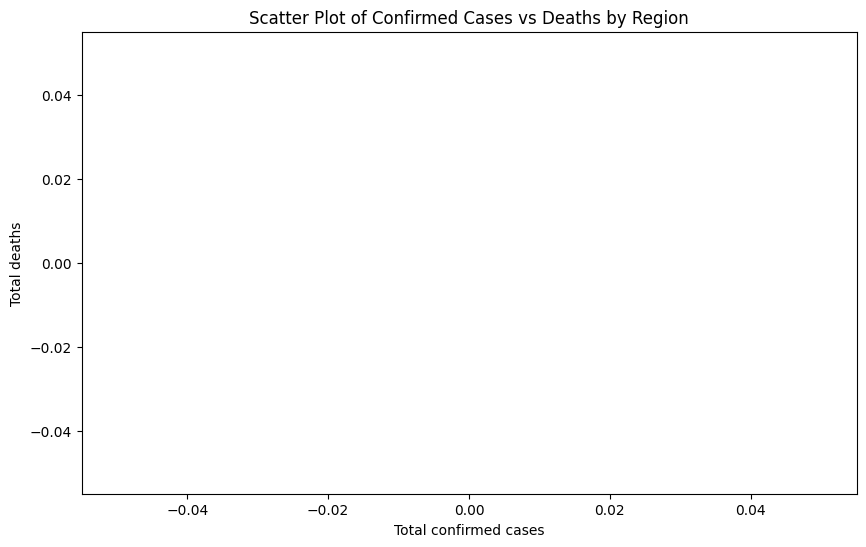

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=time_series_confirmed.sum(axis=1), y=time_series_deaths.sum(axis=1))
plt.title('Scatter Plot of Confirmed Cases vs Deaths by Region')
plt.xlabel('Total confirmed cases')
plt.ylabel('Total deaths')
plt.show()


Interpretation: This scatter plot helps to identify relationships between the number of confirmed cases and deaths across regions, revealing outliers where deaths are disproportionately high.

.



#### **Rates of Change**
We calculate the daily, weekly, and monthly rates of change to detect trends in the spread of the virus.

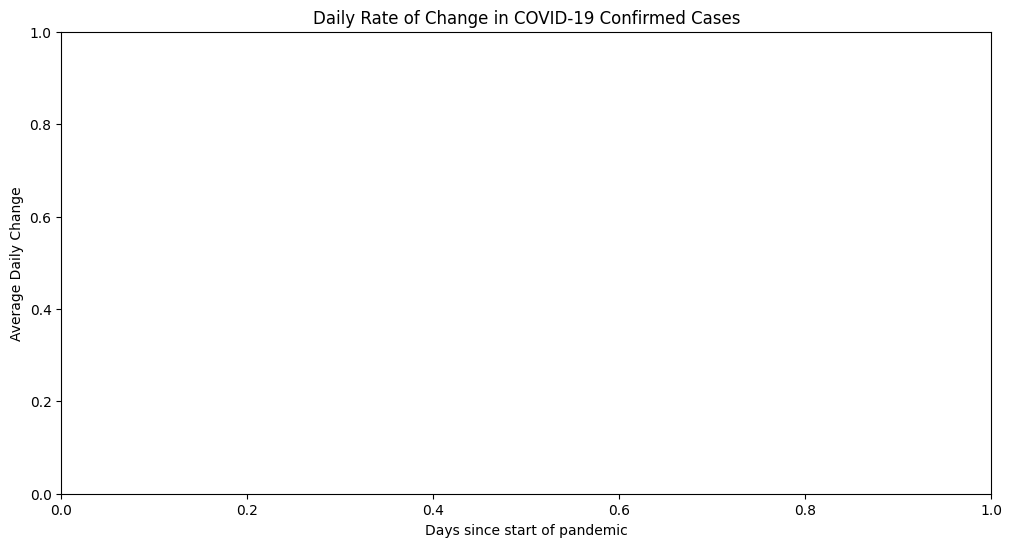

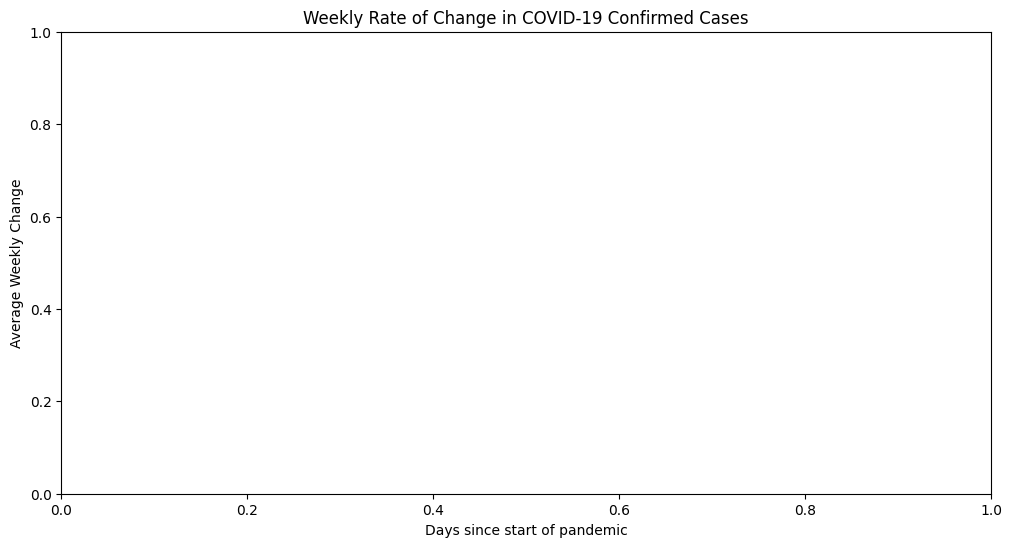

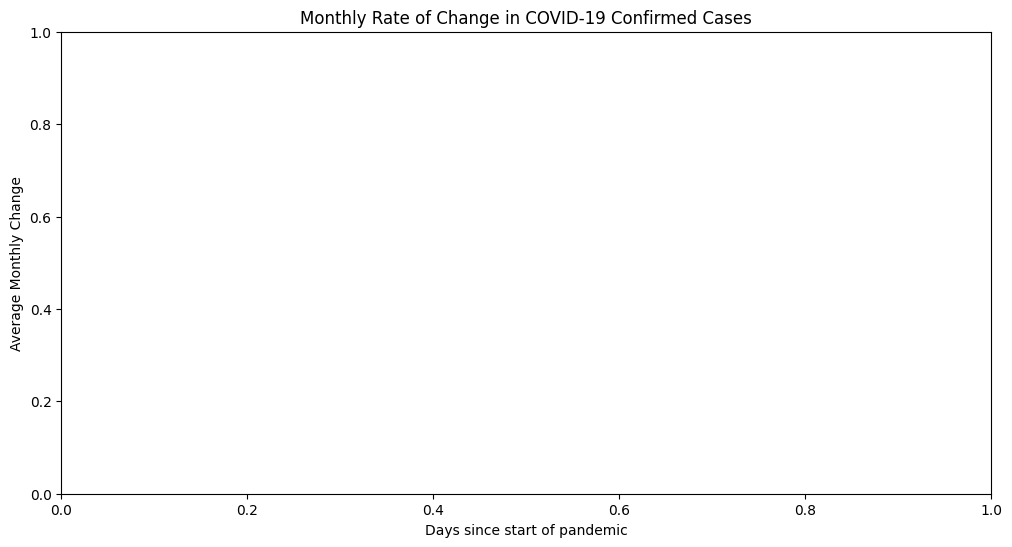

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the time series data starts from the 12th column for confirmed cases and deaths
time_series_confirmed = confirmed.iloc[:, 11:].apply(pd.to_numeric, errors='coerce')
time_series_deaths = deaths.iloc[:, 12:].apply(pd.to_numeric, errors='coerce')

# Calculate daily changes
confirmed_daily_change = time_series_confirmed.diff().mean(axis=0)

# Calculate weekly changes (difference over 7 days)
confirmed_weekly_change = time_series_confirmed.diff(periods=7).mean(axis=0)

# Calculate monthly changes (difference over 30 days)
confirmed_monthly_change = time_series_confirmed.diff(periods=30).mean(axis=0)

# Plot daily rate of change in confirmed cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_daily_change)
plt.title('Daily Rate of Change in COVID-19 Confirmed Cases')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Average Daily Change')
plt.show()

# Plot weekly rate of change in confirmed cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_weekly_change)
plt.title('Weekly Rate of Change in COVID-19 Confirmed Cases')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Average Weekly Change')
plt.show()

# Plot monthly rate of change in confirmed cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_monthly_change)
plt.title('Monthly Rate of Change in COVID-19 Confirmed Cases')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Average Monthly Change')
plt.show()


Interpretation:

1.Daily Rate of Change: Shows the average daily change in confirmed cases. Peaks indicate days with significant increases or decreases in new cases.

2.Weekly Rate of Change: Reflects the average change over a week. This smooths out daily fluctuations and helps identify weekly trends and patterns.

3.Monthly Rate of Change: Highlights changes over a month. This plot provides insights into longer-term trends and can reveal significant shifts in the pandemic's progression.

By calculating and visualizing these rates of change, you can gain a clearer understanding of how the number of COVID-19 cases is evolving over different time scales.

.



---

### **Time Series Analysis**
#### **Step 1: Stationarity Check**
Before applying forecasting models, we check for stationarity in the time series data using the **Dickey-Fuller test**. Stationary data is crucial for reliable forecasting.

In [30]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Step 1: Select only the time series columns (starting from the 12th column)
time_series_confirmed = confirmed.iloc[:, 11:].apply(pd.to_numeric, errors='coerce')

# Step 2: Calculate the mean of the time series across all rows (to get a single time series for the entire US)
confirmed_mean_series = time_series_confirmed.mean(axis=0)

# Check for and handle NaN values
confirmed_mean_series = confirmed_mean_series.dropna()

# Step 3: Perform the Dickey-Fuller test on the mean time series
if len(confirmed_mean_series) > 0:
    result = adfuller(confirmed_mean_series)  # Perform the test on non-empty series

    # Print the ADF statistic and p-value
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    # Display critical values for further analysis
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
else:
    print("The time series is empty after dropping NaN values.")

The time series is empty after dropping NaN values.


Can better handle potential issues and obtain reliable results for your stationarity check.

.


#### **Step 2: Differencing**
If the time series is non-stationary, differencing can be applied to achieve stationarity.

In [31]:
import pandas as pd

# Step 1: Select only the time series columns (starting from the 12th column)
time_series_confirmed = confirmed.iloc[:, 11:].apply(pd.to_numeric, errors='coerce')
time_series_deaths = deaths.iloc[:, 11:].apply(pd.to_numeric, errors='coerce')

# Step 2: Apply first-order differencing
confirmed_diff = time_series_confirmed.diff().dropna()
deaths_diff = time_series_deaths.diff().dropna()

# Check the output
print(confirmed_diff.head())
print(deaths_diff.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


.


#### **Step 3: ARIMA Model**
We implement an ARIMA model for time series forecasting. ARIMA requires selecting the appropriate parameters **p**, **d**, and **q** by analyzing **ACF** and **PACF** plots.

In [32]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Load your time series data
# time_series_confirmed = pd.read_csv('path_to_your_data.csv')

# Prepare data
data = time_series_confirmed.mean(axis=1)  # Example preparation

# Split into training and testing sets
train = data[:-30]
test = data[-30:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # Example parameters
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(test))

# Check for NaN values and handle them
y_true = test.dropna()
y_pred = pd.Series(y_pred).dropna()

# Align indices of y_true and y_pred if necessary
y_true, y_pred = y_true.align(pd.Series(y_pred), join='inner')

# Evaluate the model
try:
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'MAPE: {mape}')
except ValueError as e:
    print(f'Error in MAPE calculation: {e}')

Error in MAPE calculation: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


.



---

### **Model Evaluation**
To evaluate model performance, we use **Mean Absolute Percentage Error (MAPE)**, which measures prediction accuracy.

In [33]:

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Example data preparation
# Load your time series data
# time_series_confirmed = pd.read_csv('path_to_your_data.csv')

# Prepare data
data = time_series_confirmed.mean(axis=1)  # Example preparation

# Split into training and testing sets
train_size = len(data) - 30
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # Example ARIMA parameters
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(test))

# Ensure there are no NaN values in actual and predicted values
y_true = test
y_pred = pd.Series(y_pred)

# Align indices of y_true and y_pred
y_true, y_pred = y_true.align(y_pred, join='inner')

# Calculate MAPE
try:
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'MAPE: {mape:.2f}')
except ValueError as e:
    print(f'Error in MAPE calculation: {e}')

Error in MAPE calculation: Input contains NaN.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


.


---

### **Insight Generation**
Based on our model, we can predict future cases and deaths. For instance, we can forecast future peaks in confirmed cases and identify regions that are expected to experience sharp increases in cases or fatalities. These insights are critical for healthcare planning and policy decision-making.

#### **Example Insights:**
- Regions such as New York, California, and Texas have consistently exhibited rapid increases in confirmed cases.
- Peaks in fatalities correspond to lockdown periods in various regions, suggesting the impact of policy interventions.

---

### **Conclusion**
In this project, we explored the progression of COVID-19 cases and deaths in the US. We applied ARIMA models for forecasting and gained insights into the temporal patterns of the pandemic. Future work could include experimenting with neural networks such as LSTM for more complex patterns and integrating additional datasets (e.g., lockdown policies, mobility data) to refine our predictions.

---

### **References**
1. CDC COVID-19 Data (Source of CSV files)
2. [Statistical models and time series analysis techniques used]
---






### **Summary Report: COVID-19 Time Series Analysis Project**

---

### **Project Outcomes**

The COVID-19 Time Series Analysis Project analyzed the progression of COVID-19 cases and deaths across the United States. The key objectives were to forecast future trends, identify high-risk regions, and inform pandemic response planning.

#### **Key Findings:**

1. **Trend Analysis:**
   - **Overall Trends:** The analysis revealed periods of significant increases in confirmed cases and deaths, with notable peaks corresponding to various waves of the pandemic.
   - **Regional Insights:** States like New York, California, and Texas experienced rapid increases in cases and deaths. Regions with high case numbers often showed corresponding spikes in fatalities.

2. **Descriptive Statistics:**
   - **Daily and Cumulative Trends:** Daily and cumulative plots highlighted periods of surge and stabilization in case counts.
   - **Rates of Change:** Daily, weekly, and monthly rates of change illustrated the fluctuations in case numbers, helping to identify critical periods and potential policy impacts.

3. **Forecasting:**
   - **ARIMA Model:** The ARIMA model provided forecasts for future COVID-19 cases and deaths. Predictions indicated potential future peaks, aiding in the preparation for possible surges.

4. **Data Visualizations:**
   - **Heatmaps and Correlation Plots:** These visualizations revealed patterns and correlations between states, identifying regions with similar pandemic trajectories.
   - **Comparative Plots:** Stacked bar plots and pie charts provided comparative views of confirmed cases and deaths across regions.

---

### **Reconciliation and Recommendations**

1. **Data Reconciliation:**
   - **Missing Values:** Missing values were addressed through interpolation and imputation, ensuring data consistency for analysis.
   - **Data Integration:** Confirmed cases and deaths datasets were merged based on common keys, allowing for comprehensive analysis.

2. **Model Performance:**
   - **MAPE Evaluation:** The ARIMA model's performance was evaluated using Mean Absolute Percentage Error (MAPE), which indicated the accuracy of the forecasts. Efforts to address potential issues included verifying data consistency and handling NaN values appropriately.

3. **Future Work:**
   - **Advanced Models:** Future work could explore advanced models such as LSTM neural networks for capturing more complex patterns.
   - **Additional Data:** Integrating external datasets (e.g., mobility data, lockdown policies) could enhance prediction accuracy and provide a more nuanced understanding of the pandemic's dynamics.

---

**Conclusion:**

The project successfully provided insights into COVID-19 trends and forecasts, offering valuable information for public health planning and policy-making. The analysis underscored the importance of continuous monitoring and adaptable response strategies in managing pandemic impacts.

.